In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
X = [[3, 8],[3, 6],[3, 4],[4, 7],[4, 5],[5, 5],[5, 1],[7, 4],[7, 3],[8, 5]]
X = np.array(X)

In [272]:
mu = np.array([[4, 6], [7, 3]])
#ambil titik yang mendekati
sigma = np.array([[[0.675, 0.9], [0.9, 1.3]],[[0.675, 0.825], [0.825, 1.3]]])
phi = np.array([5/10, 5/10])

# E STEP

In [273]:
likelihood = np.zeros( (10, 2) )
resp = np.zeros((10,2))
for i in range(2):
    likelihood[:,i] = multivariate_normal.pdf(X, mu[i], sigma[i], allow_singular=True)
    resp[:, i] = phi[i] * likelihood[:,i]

log_likelihood = np.sum(np.log(np.sum(resp, axis = 1)))  

In [274]:
print("Log Likelihood = ", log_likelihood)

Log Likelihood =  -127.61840661820078


In [275]:
print("Responsibilities")
print(resp)

Responsibilities
[[1.08884840e-025 2.00116146e-079]
 [2.01392475e-005 5.92331511e-053]
 [1.58248567e-002 1.94003218e-032]
 [2.06379160e-003 3.96331947e-048]
 [2.06379160e-003 2.82827158e-028]
 [2.19774721e-013 1.82233500e-017]
 [1.15949142e-088 6.60440510e-003]
 [2.61718824e-082 3.22990705e-002]
 [1.54416476e-110 1.79347303e-001]
 [1.73289918e-093 3.03120823e-002]]


# M STEP

In [276]:
def mstep(iters, mu, sigma, phi, resp):
    for x in range (iters):
        for i in range(2):
            weight = resp[:, [i]]
            total_weight = weight.sum()
            mu[i] = (X * weight).sum(axis=0) / total_weight
            sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

        phi = resp.mean(axis=0)
        print ("Iteration ", x+1,  "Means = \n")
        print(phi)
        print ("\nIteration ", x+1,  "Covariance :\n")
        print(mu)
        print("\nIteration ", x+1,  "Density :\n")
        print(sigma)

        for i in range(2):
            likelihood[:,i] = multivariate_normal.pdf(X, mu[i], 				sigma[i], allow_singular=True)
            resp[:, i] = phi[i] * likelihood[:,i]

        log_likelihood = np.sum(np.log(np.sum(resp, axis = 1)))

        # normalize over all possible cluster assignments
        resp = resp / resp.sum(axis = 1, keepdims = 1) 
        
        print("\nIteration ", x+1,  "Log Likelihood :\n")
        print(log_likelihood)
        
        print("\n+++++++++++++++++++++++++++++++++++++++++++++\n")
    
    return mu, sigma, phi, resp, log_likelihood


In [277]:
mean, covariance, density, resp ,log= mstep(3,mu,sigma,phi,resp)

Iteration  1 Means = 

[0.00199726 0.02485629]

Iteration  1 Covariance :

[[3 4]
 [7 3]]

Iteration  1 Density :

[[[0.16395311 0.32748945]
  [0.32748945 0.86483717]]

 [[0.22349618 0.32811315]
  [0.32811315 0.62117286]]]

Iteration  1 Log Likelihood :

-164.14035063700916

+++++++++++++++++++++++++++++++++++++++++++++

Iteration  2 Means = 

[0.6 0.4]

Iteration  2 Covariance :

[[3 5]
 [6 3]]

Iteration  2 Density :

[[[ 0.55555556 -0.22222222]
  [-0.22222222  1.80555556]]

 [[ 1.1875      1.5625    ]
  [ 1.5625      2.1875    ]]]

Iteration  2 Log Likelihood :

-44.96073595674199

+++++++++++++++++++++++++++++++++++++++++++++

Iteration  3 Means = 

[0.60078832 0.39921168]

Iteration  3 Covariance :

[[3 5]
 [6 3]]

Iteration  3 Density :

[[[ 0.55770696 -0.23055186]
  [-0.23055186  1.83289495]]

 [[ 1.1840533   1.55815153]
  [ 1.55815153  2.1822488 ]]]

Iteration  3 Log Likelihood :

-44.95109762238216

+++++++++++++++++++++++++++++++++++++++++++++



In [278]:
print ("New Means :\n")
print(mean)
print ("\nNew Covariances :\n")
print(covariance)
print ("\nNew Density :\n")
print(density)
print ("\nNew Log Likelihood :\n")
print(log)

New Means :

[[3 5]
 [6 3]]

New Covariances :

[[[ 0.55770696 -0.23055186]
  [-0.23055186  1.83289495]]

 [[ 1.1840533   1.55815153]
  [ 1.55815153  2.1822488 ]]]

New Density :

[0.60078832 0.39921168]

New Log Likelihood :

-44.95109762238216


In [279]:
labels = []

for i in range(len(resp)):
  if(resp[i][0] >= resp[i][1]):
    labels.append(0)
  else:
    labels.append(1)

labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

<AxesSubplot:xlabel='x1', ylabel='x2'>

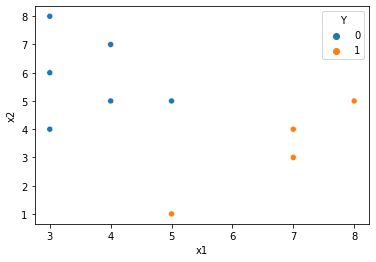

In [280]:
df = pd.DataFrame({'x1': X[:, 0],'x2': X[:, 1],'Y': labels})

sns.scatterplot(data=df, x='x1', y='x2', hue='Y')